In [1]:
# from twisted.conch.scripts.tkconch import frame
from ucimlrepo import fetch_ucirepo 
import ssl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# giving an SSLCertVerificationError when trying to fetch UCI repo
ssl._create_default_https_context = ssl._create_unverified_context

# Data Preprocessing
For milestone 2, we are completing all data preprocessing operations including fetching the data, dropping unnecessary columns, encoding categorical data and normalizing continous columns. Finally, we will be splitting the data into train, test and validation sets using a 80/20 split between test and training data, and 80/20 split between split training data and a validation set (because the data set is so large we can afford to do this).

In [3]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
features = pd.DataFrame(adult.data.features)
target = pd.DataFrame(adult.data.targets)


#drop the education column as it is already represented in the education_num column
features = features.drop(columns=['education'])
data = pd.concat([features, target], axis=1)

print("before drop missing values: ", data.shape)
# drop missing values
data = data.dropna()

print("after drop missing values: ", data.shape)


before drop missing values:  (48842, 14)
after drop missing values:  (47621, 14)


In [4]:
before = {'workclass': data['workclass'].unique(),
          'marital-status': data['marital-status'].unique(),
          'occupation': data['occupation'].unique(),
          'relationship': data['relationship'].unique(),
          'race': data['race'].unique(),
          'native-country': data['native-country'].unique(),
          'income': data['income'].unique()
          }

## Categorical Data Preprocessing
using LabelEncoder to convert categorical data to numerical data

In [5]:
cate_colname = ['workclass', 'marital-status', 'occupation', 'relationship', 'native-country','race']

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

for i in cate_colname:
    data[i] = labelEncoder.fit_transform(data[i])
data.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,Female,0,0,40,5,<=50K


In [6]:
after = {'workclass': data['workclass'].unique(),
          'marital-status': data['marital-status'].unique(),
          'occupation': data['occupation'].unique(),
          'relationship': data['relationship'].unique(),
          'race': data['race'].unique(),
          'native-country': data['native-country'].unique(),
          'income': data['income'].unique()
          }

In [7]:
# check before and after by comparing the unique values
for i in before.keys():
    print(f"col_name: {i} before: {len(before[i])} after: {len(after[i])}")

col_name: workclass before: 9 after: 9
col_name: marital-status before: 7 after: 7
col_name: occupation before: 15 after: 15
col_name: relationship before: 6 after: 6
col_name: race before: 5 after: 5
col_name: native-country before: 42 after: 42
col_name: income before: 4 after: 4


## Handling binary data

male is 0 
female is 1

income less then 50k is 0
income greater then 50k is 1

In [8]:
sex_map = {
    'Male': 0,
    'Female': 1
}

income_map = {
    '<=50K': 0,
    '>50K': 1,
    '<=50K.': 0,
    '>50K.': 1
}

# replace the values in the column
data['sex'] = data['sex'].replace(sex_map)
data['income'] = data['income'].replace(income_map)


/var/folders/45/b_y3zsxs1g35byl6x6d4f9hw0000gn/T/ipykernel_18871/1168086075.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(sex_map)
/var/folders/45/b_y3zsxs1g35byl6x6d4f9hw0000gn/T/ipykernel_18871/1168086075.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace(income_map)


In [9]:
continues_colname = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler

#normalize the continues data
scaler = StandardScaler()
data[continues_colname] = scaler.fit_transform(data[continues_colname])

## Splitting Data

In [116]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
import sys
from pathlib import Path

# Add the src directory to the system path
src_path = Path('./src')  # Path to the src directory relative to your notebook
sys.path.append(str(src_path.resolve()))

In [38]:
print((X['sex'] == 0).sum())

31937


Training SVM...
Epoch 0: Train Loss = 30.2253, Val Loss = 7.5583
Epoch 10: Train Loss = 27.7193, Val Loss = 6.9419
Epoch 20: Train Loss = 25.2134, Val Loss = 6.3255
Epoch 30: Train Loss = 22.7075, Val Loss = 5.7091
Epoch 40: Train Loss = 20.2016, Val Loss = 5.0926
Epoch 50: Train Loss = 17.6958, Val Loss = 4.4762
Epoch 60: Train Loss = 15.1899, Val Loss = 3.8598
Epoch 70: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 80: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 90: Train Loss = 14.6460, Val Loss = 3.7260
Epoch 99: Train Loss = 14.6460, Val Loss = 3.7260


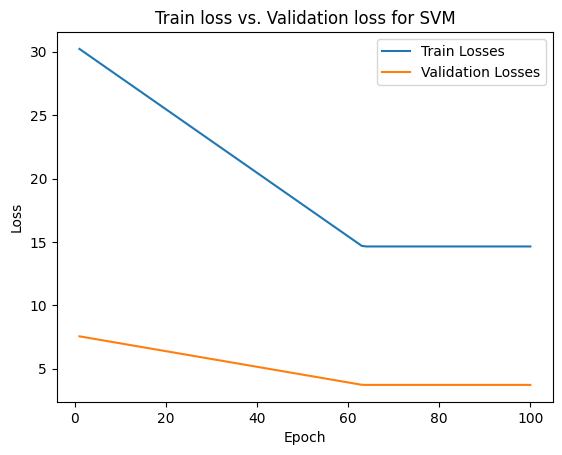

Training complete.


In [66]:
from model import svm
import importlib
importlib.reload(svm)

from model.svm import svm_

C = 0.001
learning_rate = 0.001
epoch = 100

my_svm = svm_(learning_rate=learning_rate,epoch=epoch,C_value=C,X=X_train,Y=y_train)
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy().reshape(-1, 1)

# train model
# ensuring y is in the set {-1, 1}
y_train_preprocessed = 2 * y_train -1
print("Training SVM...")
training_losses, validation_losses = my_svm.train(X_train, y_train_preprocessed)
print("Training complete.")

In [78]:
# testing the model
print("Evaluating SVM...")
y_test_preprocessed = 2 * y_test -1
y_pred = my_svm.evaluate(X_test,y_test_preprocessed)


Evaluating SVM...
Accuracy on test dataset: 0.752755905511811


Training Logistic Regression Model
Epoch: 1: train Loss: 0.6931471805599467, Validation Loss: 0.6931471805599467
Epoch: 101: train Loss: 0.5466174898230871, Validation Loss: 0.5512382346414255
Epoch: 201: train Loss: 0.535809586485702, Validation Loss: 0.5407940523161305
Epoch: 301: train Loss: 0.5266274385752403, Validation Loss: 0.5319378376888003
Epoch: 401: train Loss: 0.5186941613280657, Validation Loss: 0.5242967355492428
Epoch: 501: train Loss: 0.5117497634065379, Validation Loss: 0.5176151322356476
Epoch: 601: train Loss: 0.505608535298446, Validation Loss: 0.5117114062871817
Epoch: 701: train Loss: 0.5001331207163392, Validation Loss: 0.5064517786332857
Epoch: 801: train Loss: 0.4952186922013235, Validation Loss: 0.5017344584840907
Epoch: 901: train Loss: 0.4907830954837476, Validation Loss: 0.49747983511924126
Epoch: 1001: train Loss: 0.4867605255986569, Validation Loss: 0.49362422503193026
Epoch: 1101: train Loss: 0.48309732905163105, Validation Loss: 0.4901157456438012
Epoc

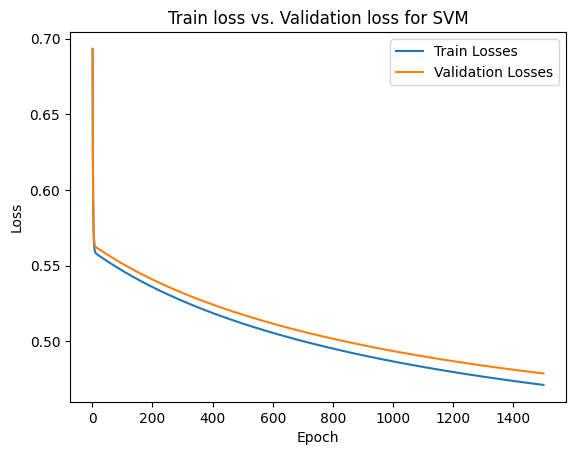

In [86]:
# Logistic Regression with Regularization
from model import LogisticRegression
import importlib
importlib.reload(LogisticRegression)

from model.LogisticRegression import LogisticRegression_


lr_learning_rate = 0.001
lr_epoch = 1500
c = 0.001

lr = LogisticRegression_(c,lr_learning_rate, lr_epoch, X_train, y_train)

print("Training Logistic Regression Model")
lr.train()

In [117]:
print("Evaluating LogisticRegression ...")
y_pred = lr.evaluate(X_test, y_test)

Evaluating LogisticRegression ...
Accuracy: 0.7562204724409449


In [ ]:
from sklearn.metrics import confusion_matrix

# Ensure male_mask applies only to the rows in X_test corresponding to y_test
# Reset the indices of X_test and y_test to ensure alignment
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)  # Convert y_pred to a Series if it's not already

# Create the boolean masks for males and females
male_mask = X_test['sex'] == 0
female_mask = X_test['sex'] == 1

# Filter y_test and y_pred using the male and female masks
y_test_male = y_test[male_mask]
y_pred_male = y_pred[male_mask]

# Get confusion matrix for males
cm = confusion_matrix(y_test_male, y_pred_male)

tn, fp, fn, tp = cm.ravel()

# Calculate TPR and FPR for males
male_tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
male_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
print("Male TPR:", male_tpr)
print("Male FPR:", male_fpr)


Male TPR: 0.10324189526184539
Male FPR: 0.029378273741744478


In [121]:
from sklearn.metrics import confusion_matrix

# Get the unique races in the dataset
unique_races = X_test['race'].unique()

# Iterate through each race to calculate TPR
for race in unique_races:
    # Create a mask for the current race
    race_mask = X_test['race'] == race
    
    # Filter y_test and y_pred for the current race
    y_test_race = y_test[race_mask]
    y_pred_race = y_pred[race_mask]
    
    # Get confusion matrix for the current race
    cm = confusion_matrix(y_test_race, y_pred_race)
    
    # Ensure the confusion matrix is 2x2
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        
        # Calculate TPR for the current race
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        print(f"Race {race}: TPR = {tpr:.2f}")
    else:
        print(f"Race {race}: Confusion matrix is not 2x2. Check data.")


Race 4: TPR = 0.09
Race 2: TPR = 0.05
Race 1: TPR = 0.36
Race 0: TPR = 0.00
Race 3: TPR = 0.17


In [19]:
%load_ext autoreload
%autoreload 2

#Random Forests

from model.random_forest import random_forest

rf = random_forest(forest_size=100, max_tree_depth=7)
print("Training Random Forest Classifier...")
rf.fit(X_train.values, y_train)
print("Training ended")

y_pred, y_pred_probabilities = rf.predict(X_test.values)
accuracy_score, entropy_loss = rf.evaluate(y_test_preprocessed, y_pred, y_pred_probabilities)

print(f"Accuracy: {accuracy_score}")
print(f"Cross Entropy Loss: {entropy_loss}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training Random Forest Classifier...
fitting model...
Training ended
aggregated predictions for  0  samples.
aggregated predictions for  1000  samples.
aggregated predictions for  2000  samples.
aggregated predictions for  3000  samples.
aggregated predictions for  4000  samples.
aggregated predictions for  5000  samples.
aggregated predictions for  6000  samples.
aggregated predictions for  7000  samples.
aggregated predictions for  8000  samples.
aggregated predictions for  9000  samples.
Accuracy: 0.8494488188976378
Cross Entropy Loss: 5.419088411807237
